# ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose, ramuda):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        self.ramuda = ramuda

    def fit(self, X, y, X_val=None, y_val=None, val=False):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        
    
        if not self.bias:
            X_bias= np.ones((X.shape[0],1))
            #X_train_bias = np.concatenate([X_bias,X], 1)
            X= np.concatenate([X_bias,X], 1)
            if val:
                X_val_bias_b= np.ones((X_val.shape[0],1))
                X_val_bias = np.concatenate([X_val_bias_b,X_val], 1)
                
        self.X= X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val 
        
        #self.X = X_train_bias
           
        
        #coefの初期値作る
        self.coef = np.random.randn(self.X.shape[1],1) #heta 平均0、分散1（標準偏差1）の正規分布（標準正規分布）に従う乱数を返す。
        
        for i in range(self.iter):
            self.loss[i] = self.cost(self.X, self.y)
            if val:
                self.val_loss[i] = self.cost(self.X_val, self.y_val)
                
            self._gradient_discent(self.X)

        if (self.verbose) & (i % 200 == 0):
                print(f'train：{self.loss[i]}')
                if val:
                    print(f'val：{self.val_loss[i]}')
        
    
    def cost(self, X, y):
        
        seikikakou = (self.ramuda/(2*X.shape[0]))*(np.sum(np.power(self.coef, 2)))

        return (1 / X.shape[0])* (np.dot(-y, np.log(self._h_theta_sigmoido(X))) - np.dot((1-y), np.log(1 - self._h_theta_sigmoido(X)))) + seikikakou    


    def _h_theta_sigmoido(self, X):
        h_theta = np.dot(X, self.coef)
        return (1/(1+np.exp(-h_theta)))
    
    def _gradient_discent(self, X):
        m = self.X.shape[0]
        
        self.y_re = self.y.reshape([67, 1])
        
#         self.coef[0] = self.coef[0] - self.lr / m * np.dot(self.X[:, 0].T, (self._h_theta_sigmoido(self.X) - self.y))
        self.coef[0] = self.coef[0] - self.lr / m * np.dot(self.X[:, 0].T, (self._h_theta_sigmoido(self.X) - self.y_re))
        self.coef[1:] = self.coef[1:] - ((self.lr / m * np.dot(self.X[:, 1:].T, (self._h_theta_sigmoido(self.X) - self.y_re))) + ((self.coef[1:])*self.lr*self.ramuda/m))
        


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        probably = self.predict_proba(X)
        
        return np.where(probably < 0.5, 0, 1)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return self._h_theta_sigmoido(X)

In [3]:
"""
        print(self.coef.shape)
        d = (self.X[:, 0]).T
        print(d)
        print(d.shape) #67,
        print((self._h_theta_sigmoido(self.X)).shape) #67,1
        print((self.y).shape) #67
        print("aaa")
        print(self.y)
        print((self.y.reshape([67, 1])).shape) #67
        print((self._h_theta_sigmoido(self.X) - self.y.reshape([67, 1])).shape) #67,1
        """

'\n        print(self.coef.shape)\n        d = (self.X[:, 0]).T\n        print(d)\n        print(d.shape) #67,\n        print((self._h_theta_sigmoido(self.X)).shape) #67,1\n        print((self.y).shape) #67\n        print("aaa")\n        print(self.y)\n        print((self.y.reshape([67, 1])).shape) #67\n        print((self._h_theta_sigmoido(self.X) - self.y.reshape([67, 1])).shape) #67,1\n        '

# 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。

線形回帰の仮定関数

In [4]:
#X = np.arange(6).reshape([2,3])
#X

In [5]:
#y= np.arange(4).reshape([4,1])
#y

In [6]:
#y[3]

In [7]:
# X = np.insert(X, 0, 1, axis = 1)
# X[1,:]

In [8]:
# X.shape

In [9]:
# coef = np.random.randn(X.shape[1],1)
# coef


In [10]:
# coef[1:]= 1

In [11]:
# coef

In [12]:
# h_theta = np.dot(X, coef)
# h_theta

In [13]:
# h_theta_sigmoido = 1/(1+np.exp(h_theta))
# h_theta_sigmoido

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

A.classに実装しました

# 【問題3】推定

推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

# 【問題4】目的関数

下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください

# 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = X[['sepal_length','petal_length']]
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df = df[df.Species.isin([1,2])].reset_index(drop=True)
df.loc[df.Species == 2, 'Species'] = 0 
y = df.Species
del df['Species']

from sklearn.model_selection import train_test_split
train, val_train, y_train, y_val = train_test_split(np.array(df), np.array(y), test_size=0.33, random_state=42)

slr = ScratchLogisticRegression(5000, 0.001, bias=True, verbose=False, ramuda=1)

In [15]:
from sklearn.linear_model import LogisticRegression
sklearn_slr = LogisticRegression()
sklearn_slr.fit(train, y_train)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
slr.fit(train, y_train, val_train, y_val, val=True)

In [17]:
slr.coef

array([[ 0.34237461],
       [-0.49187786]])

In [18]:
slr._h_theta_sigmoido(val_train)

array([[0.41299035],
       [0.35490305],
       [0.39142673],
       [0.47144318],
       [0.4629209 ],
       [0.47889977],
       [0.43702583],
       [0.3853543 ],
       [0.49757516],
       [0.52118639],
       [0.4773336 ],
       [0.50348107],
       [0.43702583],
       [0.3883319 ],
       [0.38684205],
       [0.49070028],
       [0.44070752],
       [0.42025751],
       [0.52167047],
       [0.51577284],
       [0.3442646 ],
       [0.4239043 ],
       [0.49178415],
       [0.5045652 ],
       [0.40007764],
       [0.53236651],
       [0.43015906],
       [0.42496374],
       [0.4655607 ],
       [0.34089751],
       [0.48853281],
       [0.50191194],
       [0.4099504 ]])

In [19]:
slr.predict_proba(val_train)

array([[0.41299035],
       [0.35490305],
       [0.39142673],
       [0.47144318],
       [0.4629209 ],
       [0.47889977],
       [0.43702583],
       [0.3853543 ],
       [0.49757516],
       [0.52118639],
       [0.4773336 ],
       [0.50348107],
       [0.43702583],
       [0.3883319 ],
       [0.38684205],
       [0.49070028],
       [0.44070752],
       [0.42025751],
       [0.52167047],
       [0.51577284],
       [0.3442646 ],
       [0.4239043 ],
       [0.49178415],
       [0.5045652 ],
       [0.40007764],
       [0.53236651],
       [0.43015906],
       [0.42496374],
       [0.4655607 ],
       [0.34089751],
       [0.48853281],
       [0.50191194],
       [0.4099504 ]])

In [20]:
pred = slr.predict(val_train)
pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [21]:
sklearn_slr.predict(val_train)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [22]:
from sklearn.metrics import f1_score
f1_score(y_val, pred)

0.5384615384615384

# 【問題6】学習曲線のプロット

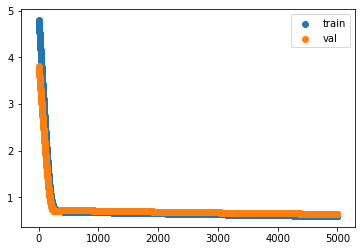

In [25]:
plt.scatter(list(range(len(slr.loss))), slr.loss, label='train')
plt.scatter(list(range(len(slr.loss))), slr.val_loss, label='val')
plt.legend()
plt.show()

# 【問題7】決定領域の可視化

In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=["versicolor", "virginica"],
):
    # setting
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(set(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

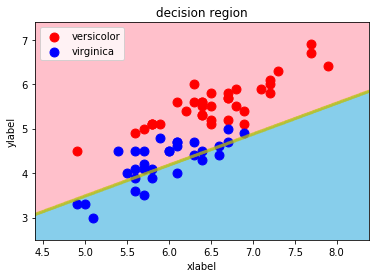

In [29]:
decision_region(train, y_train, slr)

In [30]:
pd.DataFrame(slr.coef).to_pickle('coef.pkl')
slr.coef

array([[ 0.34237461],
       [-0.49187786]])

In [31]:
view = pd.read_pickle('coef.pkl')
view

,0
0,0.342375
1,-0.491878
